### Extract Data Set and Load the Data

In [27]:
import os
import docx
import pandas as pd

# Function to extract text from .docx files
def extract_docx_text(docx_path):
    try:
        doc = docx.Document(docx_path)
        text = ''
        for para in doc.paragraphs:
            text += para.text + '\n'
        return text.strip()  # Strip any trailing whitespace
    except Exception as e:
        print(f"Error reading .docx file {docx_path}: {e}")
        return ''

# Function to extract text from .doc files (Windows only)
# You need pywin32 installed (via pip install pywin32)
def extract_doc_text(doc_path):
    try:
        import win32com.client
        word = win32com.client.Dispatch("Word.Application")
        doc = word.Documents.Open(doc_path)
        text = doc.Content.Text
        doc.Close()
        word.Quit()
        return text.strip()  # Strip any trailing whitespace
    except Exception as e:
        print(f"Error reading .doc file {doc_path}: {e}")
        return ''

# Set the folder path where your subfolders are located
folder_path = r'C:\Users\banot\Downloads\P548_dataset\P-344 Dataset'

# Initialize lists to hold file names, job roles, and extracted content
file_names = []
job_roles = []
content_list = []

# Loop through all subdirectories and files in the folder
for subdir, _, files in os.walk(folder_path):
    for file_name in files:
        file_path = os.path.join(subdir, file_name)

        # Get the file extension
        file_extension = os.path.splitext(file_name)[-1].lower()  # Get extension and make it lowercase

        # If there's no extension, assume it's a Word document and append .docx
        if not file_extension:
            print(f"Warning: {file_name} doesn't have an extension, assuming it's a .docx file.")
            file_extension = '.docx'
            file_name = file_name + '.docx'
            file_path = os.path.join(subdir, file_name)  # Update file path with .docx extension
        
        # Extract job role (subfolder name)
        job_role = os.path.basename(subdir)  # Get the name of the subfolder
        
        # Debugging: Print out the file name, job role, and extension
        print(f"Processing file: {file_name} (Extension: {file_extension}) in Job Role: {job_role}")

        # Only process .docx and .doc files
        if file_extension == '.docx':
            # Extract the content from the .docx file
            content = extract_docx_text(file_path)
            if content:  # Check if we got some content
                file_names.append(file_name)
                job_roles.append(job_role)
                content_list.append(content)
            else:
                print(f"Warning: No content extracted from {file_name}")
            
        elif file_extension == '.doc':
            # Extract the content from the .doc file (Windows only)
            content = extract_doc_text(file_path)
            if content:  # Check if we got some content
                file_names.append(file_name)
                job_roles.append(job_role)
                content_list.append(content)
            else:
                print(f"Warning: No content extracted from {file_name}")

# Check if we have collected data
if not file_names:
    print("No files processed successfully. Please check if files are in the correct format.")
else:
    # Create a DataFrame from the lists, including job roles
    df = pd.DataFrame({
        'file_name': file_names,
        'jobrole': job_roles,  # New column for job role
        'content': content_list
    })

    # Save the DataFrame to a CSV file
    df.to_csv('extracted_resume_data_combined.csv', index=False)

    print("Content extracted and saved to 'extracted_resume_data_combined.csv'")

Processing file: Peoplesoft Admin_G Ananda Rayudu.docx (Extension: .docx) in Job Role: Peoplesoft
Error reading .docx file C:\Users\banot\Downloads\P548_dataset\P-344 Dataset\Resumes_Docx\Peoplesoft\Peoplesoft Admin_G Ananda Rayudu.docx: "no relationship of type 'http://schemas.openxmlformats.org/officeDocument/2006/relationships/officeDocument' in collection"
Processing file: Peoplesoft Admin_AnubhavSingh.docx (Extension: .docx) in Job Role: Peoplesoft Resume
Processing file: Peoplesoft Admin_G Ananda Rayudu.doc (Extension: .doc) in Job Role: Peoplesoft Resume
Processing file: Peoplesoft Admin_Gangareddy.doc (Extension: .doc) in Job Role: Peoplesoft Resume
Processing file: Peoplesoft Admin_Murali.docx (Extension: .docx) in Job Role: Peoplesoft Resume
Processing file: Peoplesoft Admin_Priyanka Ramadoss.doc (Extension: .doc) in Job Role: Peoplesoft Resume
Processing file: Peoplesoft Admin_SirazuddinMohammad.docx (Extension: .docx) in Job Role: Peoplesoft Resume
Processing file: Peopleso

In [28]:
df

file_name            jobrole  \
0       Peoplesoft Admin_AnubhavSingh.docx  Peoplesoft Resume   
1     Peoplesoft Admin_G Ananda Rayudu.doc  Peoplesoft Resume   
2          Peoplesoft Admin_Gangareddy.doc  Peoplesoft Resume   
3             Peoplesoft Admin_Murali.docx  Peoplesoft Resume   
4   Peoplesoft Admin_Priyanka Ramadoss.doc  Peoplesoft Resume   
..                                     ...                ...   
73              Sri Krishna S_Hexaware.doc            workday   
74                  Srikanth-Hexaware.docx            workday   
75                   SSKumar_Hexaware.docx            workday   
76            Venkateswarlu B_Hexaware.doc            workday   
77               Vinay Kumar_Hexaware.docx            workday   

                                              content  
0   Anubhav Kumar Singh\t\t\n\n  To work in a glob...  
1   Profile Summary:\t\t\t\t\t\t\t\t\t\t\r7+ years...  
2   PeopleSoft Database Administrator\r           ...  
3   Murali\n\nExperience Summary \n\nI have 6 year...  
4   Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...  
..                                                ...  
73  Workday Integration Consultant\r\rName        ...  
74  Seeking suitable positions in Workday HCM  as ...  
75  WORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nRol...  
76  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...  
77  Vinay kumar .v\nWorkday Functional Consultant\...  

[78 rows x 3 columns]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  78 non-null     object
 1   jobrole    78 non-null     object
 2   content    78 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


In [30]:
df.describe()

file_name          jobrole  \
count                                   78               78   
unique                                  78                4   
top     Peoplesoft Admin_AnubhavSingh.docx  React Developer   
freq                                     1               23   

                                                  content  
count                                                  78  
unique                                                 78  
top     Anubhav Kumar Singh\t\t\n\n  To work in a glob...  
freq                                                    1

In [31]:
df.shape

(78, 3)

In [32]:
#missing values
df.isnull().sum()

file_name    0
jobrole      0
content      0
dtype: int64

In [33]:
df['jobrole'].value_counts()

jobrole
React Developer      23
workday              21
Peoplesoft Resume    20
SQL Developer        14
Name: count, dtype: int64

### EDA(Exploratory Data Analysis)

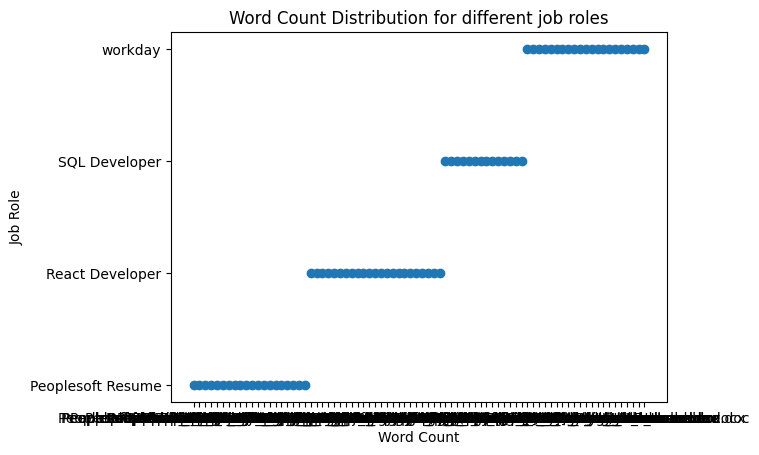

In [35]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.scatter(x =df["file_name"], y =df["jobrole"])
plt.title("Word Count Distribution for different job roles")
plt.xlabel("Word Count")
plt.ylabel("Job Role")
plt.show()          

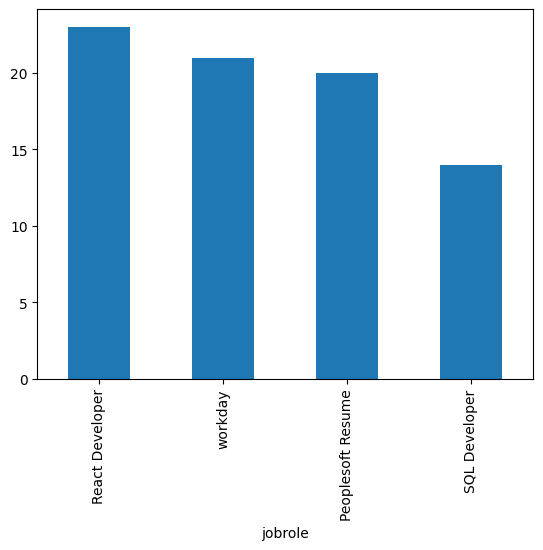

In [36]:
import matplotlib.pyplot as plt 
df["jobrole"].value_counts().plot(kind ='bar')
plt.show()

In [37]:
df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))

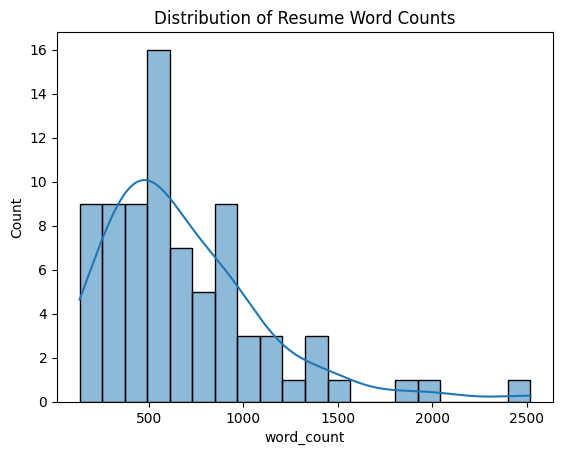

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['word_count'], bins=20, kde=True)
plt.title('Distribution of Resume Word Counts')
plt.show()


### NLP Preprocessing Techniques

##### We have some methods in Text preprocessing techniques
##### 1.Tokenization 
##### 2.Normalization 
##### 3.Remove punctuation 
##### 4.Remove stop words 
##### 5.Stemming 
##### 6.lemmatization

In [41]:
# Specify the path to your .txt file
file_path ='extracted_resume_data_combined.csv'

In [42]:
# Open and read the contents of the file
with open(file_path, "r", encoding='utf-8') as file:
    text_data = file.read()


In [43]:
text_data

'file_name,jobrole,content\nPeoplesoft Admin_AnubhavSingh.docx,Peoplesoft Resume,"Anubhav Kumar Singh\t\t\n\n  To work in a globally competitive environment on \n  challenging assignments that shall yield the \n  twin benefits of the job satisfaction and a steady-paced \n  professional growth.\n\n\n\n\n\n\n \n\n\n \n\n\n Professional Experience\n\n 06/2019 - Current\tHCL\t\t\t\t\t\t\t\t\t\t\n\t\t\tCurrent Role: System Admin Offshore\n\t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , Github\n\nManaging PeopleSoft HCM and PeopleSoft FSCM production environments along with support environments installed on Linux and Windows OS.\nInvolved in Day to Day activities such as Project Migration, Database Refresh, System admin changes, Tax updates etc.\nTroubleshooting of various servers like application servers, Web Servers, Process Scheduler Servers.\nApplying Tuxedo and WebLogic Middleware CPU patches for various applications.\nWorking on shell scripting used as integration m

In [44]:
# Display or process the text data as needed
print(text_data)

file_name,jobrole,content
Peoplesoft Admin_AnubhavSingh.docx,Peoplesoft Resume,"Anubhav Kumar Singh		

  To work in a globally competitive environment on 
  challenging assignments that shall yield the 
  twin benefits of the job satisfaction and a steady-paced 
  professional growth.






 


 


 Professional Experience

 06/2019 - Current	HCL										
			Current Role: System Admin Offshore
			Skills : Shell Scripting, Linux , PeopleSoft Administration , Github

Managing PeopleSoft HCM and PeopleSoft FSCM production environments along with support environments installed on Linux and Windows OS.
Involved in Day to Day activities such as Project Migration, Database Refresh, System admin changes, Tax updates etc.
Troubleshooting of various servers like application servers, Web Servers, Process Scheduler Servers.
Applying Tuxedo and WebLogic Middleware CPU patches for various applications.
Working on shell scripting used as integration method for exchange of files to external systems
I

#### 1.Tokenization

In [46]:
# 1.Tokenize the text 
from nltk.tokenize import word_tokenize 
words =word_tokenize(text_data)

In [47]:
print(words)

['file_name', ',', 'jobrole', ',', 'content', 'Peoplesoft', 'Admin_AnubhavSingh.docx', ',', 'Peoplesoft', 'Resume', ',', "''", 'Anubhav', 'Kumar', 'Singh', 'To', 'work', 'in', 'a', 'globally', 'competitive', 'environment', 'on', 'challenging', 'assignments', 'that', 'shall', 'yield', 'the', 'twin', 'benefits', 'of', 'the', 'job', 'satisfaction', 'and', 'a', 'steady-paced', 'professional', 'growth', '.', 'Professional', 'Experience', '06/2019', '-', 'Current', 'HCL', 'Current', 'Role', ':', 'System', 'Admin', 'Offshore', 'Skills', ':', 'Shell', 'Scripting', ',', 'Linux', ',', 'PeopleSoft', 'Administration', ',', 'Github', 'Managing', 'PeopleSoft', 'HCM', 'and', 'PeopleSoft', 'FSCM', 'production', 'environments', 'along', 'with', 'support', 'environments', 'installed', 'on', 'Linux', 'and', 'Windows', 'OS', '.', 'Involved', 'in', 'Day', 'to', 'Day', 'activities', 'such', 'as', 'Project', 'Migration', ',', 'Database', 'Refresh', ',', 'System', 'admin', 'changes', ',', 'Tax', 'updates', 'e

In [48]:
len(words)

63461

#### 2.Normalization

In [50]:
# 2.Normalization
# Convert all words to Lowercase 
words2 =[x.lower() for x in words]

In [51]:
print(words2)

['file_name', ',', 'jobrole', ',', 'content', 'peoplesoft', 'admin_anubhavsingh.docx', ',', 'peoplesoft', 'resume', ',', "''", 'anubhav', 'kumar', 'singh', 'to', 'work', 'in', 'a', 'globally', 'competitive', 'environment', 'on', 'challenging', 'assignments', 'that', 'shall', 'yield', 'the', 'twin', 'benefits', 'of', 'the', 'job', 'satisfaction', 'and', 'a', 'steady-paced', 'professional', 'growth', '.', 'professional', 'experience', '06/2019', '-', 'current', 'hcl', 'current', 'role', ':', 'system', 'admin', 'offshore', 'skills', ':', 'shell', 'scripting', ',', 'linux', ',', 'peoplesoft', 'administration', ',', 'github', 'managing', 'peoplesoft', 'hcm', 'and', 'peoplesoft', 'fscm', 'production', 'environments', 'along', 'with', 'support', 'environments', 'installed', 'on', 'linux', 'and', 'windows', 'os', '.', 'involved', 'in', 'day', 'to', 'day', 'activities', 'such', 'as', 'project', 'migration', ',', 'database', 'refresh', ',', 'system', 'admin', 'changes', ',', 'tax', 'updates', 'e

In [52]:
from nltk.corpus import stopwords 
stopwords_list =stopwords.words('english')
stopwords_list

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [53]:
len(stopwords_list)

198

#### 3.Remove stop words 

In [55]:
# 3.Remove stop words 
words3 =[x for x in words2 if x not in stopwords_list]
words3

['file_name',
 ',',
 'jobrole',
 ',',
 'content',
 'peoplesoft',
 'admin_anubhavsingh.docx',
 ',',
 'peoplesoft',
 'resume',
 ',',
 "''",
 'anubhav',
 'kumar',
 'singh',
 'work',
 'globally',
 'competitive',
 'environment',
 'challenging',
 'assignments',
 'shall',
 'yield',
 'twin',
 'benefits',
 'job',
 'satisfaction',
 'steady-paced',
 'professional',
 'growth',
 '.',
 'professional',
 'experience',
 '06/2019',
 '-',
 'current',
 'hcl',
 'current',
 'role',
 ':',
 'system',
 'admin',
 'offshore',
 'skills',
 ':',
 'shell',
 'scripting',
 ',',
 'linux',
 ',',
 'peoplesoft',
 'administration',
 ',',
 'github',
 'managing',
 'peoplesoft',
 'hcm',
 'peoplesoft',
 'fscm',
 'production',
 'environments',
 'along',
 'support',
 'environments',
 'installed',
 'linux',
 'windows',
 'os',
 '.',
 'involved',
 'day',
 'day',
 'activities',
 'project',
 'migration',
 ',',
 'database',
 'refresh',
 ',',
 'system',
 'admin',
 'changes',
 ',',
 'tax',
 'updates',
 'etc',
 '.',
 'troubleshooting',
 

In [56]:
print("after stopwords:", len(words3))

after stopwords: 50593


#### 4.Remove Punctuation

In [58]:
# 4.Remove Punctuation
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~.....''``'s'''

<>:2: SyntaxWarning: invalid escape sequence '\,'
<>:2: SyntaxWarning: invalid escape sequence '\,'
C:\Users\banot\AppData\Local\Temp\ipykernel_26548\2366207907.py:2: SyntaxWarning: invalid escape sequence '\,'
  punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~.....''``'s'''


In [59]:
words_without_punctuation =[]

In [60]:
for x in words3:
    if x not in punctuations:
        words_without_punctuation.append(x)

In [61]:
#print(words_without_punctuation)

In [62]:
print('words with out punctuation:', len(words_without_punctuation))

words with out punctuation: 40628


In [63]:
words_without_punctuation[:5]

['file_name', 'jobrole', 'content', 'peoplesoft', 'admin_anubhavsingh.docx']

### 5. Stemming
##### Definition: Cuts off word suffixes to reduce words to their base or root form (may not be a valid word).
#####  Doesn’t consider context or grammar.
#####  Fast but often less accurate.

In [65]:
e_words= words_without_punctuation

from nltk.stem import PorterStemmer
p_stemmer = PorterStemmer()

for x in e_words:
    print(x+' --> '+p_stemmer.stem(x))


file_name --> file_nam
jobrole --> jobrol
content --> content
peoplesoft --> peoplesoft
admin_anubhavsingh.docx --> admin_anubhavsingh.docx
peoplesoft --> peoplesoft
resume --> resum
anubhav --> anubhav
kumar --> kumar
singh --> singh
work --> work
globally --> global
competitive --> competit
environment --> environ
challenging --> challeng
assignments --> assign
shall --> shall
yield --> yield
twin --> twin
benefits --> benefit
job --> job
satisfaction --> satisfact
steady-paced --> steady-pac
professional --> profession
growth --> growth
professional --> profession
experience --> experi
06/2019 --> 06/2019
current --> current
hcl --> hcl
current --> current
role --> role
system --> system
admin --> admin
offshore --> offshor
skills --> skill
shell --> shell
scripting --> script
linux --> linux
peoplesoft --> peoplesoft
administration --> administr
github --> github
managing --> manag
peoplesoft --> peoplesoft
hcm --> hcm
peoplesoft --> peoplesoft
fscm --> fscm
production --> product


### 6. Lemmatization
##### Definition: Converts word to its dictionary (lemma) form by considering part of speech and context.
#####             More accurate, but slower.

In [67]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

# Download required resources (if not already downloaded)
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

# Sample word list
e_words = words_without_punctuation

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to get correct POS tag
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    pos_map = {'J': wordnet.ADJ, 'N': wordnet.NOUN, 'V': wordnet.VERB, 'R': wordnet.ADV}
    return pos_map.get(tag, wordnet.NOUN)

# Lemmatize each word
for x in e_words:
    pos = get_wordnet_pos(x)
    print(x + ' --> ' + lemmatizer.lemmatize(x, pos))

file_name --> file_name
jobrole --> jobrole
content --> content
peoplesoft --> peoplesoft
admin_anubhavsingh.docx --> admin_anubhavsingh.docx
peoplesoft --> peoplesoft
resume --> resume
anubhav --> anubhav
kumar --> kumar
singh --> singh
work --> work
globally --> globally
competitive --> competitive
environment --> environment
challenging --> challenge
assignments --> assignment
shall --> shall
yield --> yield
twin --> twin
benefits --> benefit
job --> job
satisfaction --> satisfaction
steady-paced --> steady-paced
professional --> professional
growth --> growth
professional --> professional
experience --> experience
06/2019 --> 06/2019
current --> current
hcl --> hcl
current --> current
role --> role
system --> system
admin --> admin
offshore --> offshore
skills --> skill
shell --> shell
scripting --> script
linux --> linux
peoplesoft --> peoplesoft
administration --> administration
github --> github
managing --> manage
peoplesoft --> peoplesoft
hcm --> hcm
peoplesoft --> peoplesoft


#### Wordcloud

In [69]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

In [70]:
#Create a dictionary to store the word frequency 
word_counts = {}
for x in words_without_punctuation:
    if x not in word_counts:
        word_counts[x] =0
    word_counts[x] += 1

In [71]:
word_counts

{'file_name': 1,
 'jobrole': 1,
 'content': 8,
 'peoplesoft': 442,
 'admin_anubhavsingh.docx': 1,
 'resume': 23,
 'anubhav': 1,
 'kumar': 9,
 'singh': 2,
 'work': 121,
 'globally': 2,
 'competitive': 2,
 'environment': 121,
 'challenging': 12,
 'assignments': 8,
 'shall': 2,
 'yield': 1,
 'twin': 1,
 'benefits': 30,
 'job': 58,
 'satisfaction': 6,
 'steady-paced': 1,
 'professional': 96,
 'growth': 17,
 'experience': 570,
 '06/2019': 2,
 'current': 18,
 'hcl': 1,
 'role': 100,
 'system': 171,
 'admin': 32,
 'offshore': 2,
 'skills': 149,
 'shell': 9,
 'scripting': 7,
 'linux': 32,
 'administration': 48,
 'github': 9,
 'managing': 20,
 'hcm': 155,
 'fscm': 71,
 'production': 131,
 'environments': 63,
 'along': 8,
 'support': 172,
 'installed': 38,
 'windows': 85,
 'os': 7,
 'involved': 183,
 'day': 48,
 'activities': 64,
 'project': 285,
 'migration': 52,
 'database': 224,
 'refresh': 20,
 'changes': 59,
 'tax': 25,
 'updates': 46,
 'etc': 70,
 'troubleshooting': 62,
 'various': 144,
 '

In [72]:
#Create the word cloud 
wordcloud = WordCloud(width =800, height =600, background_color ='white').generate_from_frequencies(word_counts)

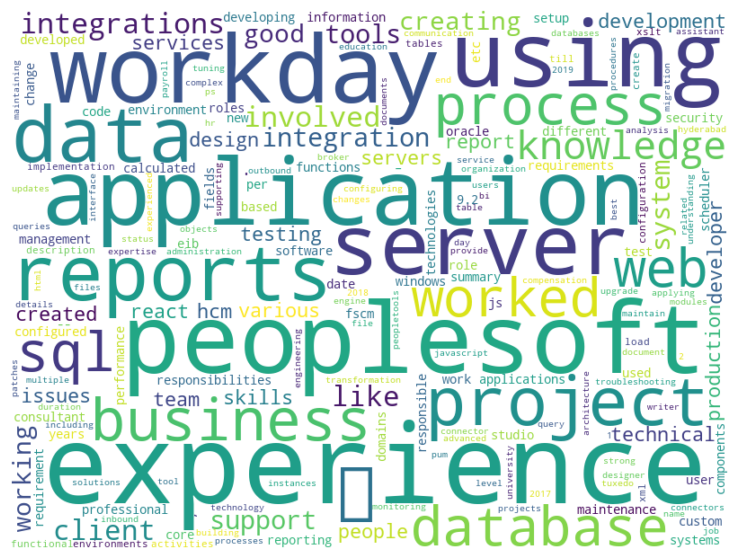

In [73]:
#Display the word cloud 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation ="bilinear")
plt.axis("off")
plt.show()

In [74]:
doc =" ".join(words_without_punctuation)
doc

"file_name jobrole content peoplesoft admin_anubhavsingh.docx peoplesoft resume anubhav kumar singh work globally competitive environment challenging assignments shall yield twin benefits job satisfaction steady-paced professional growth professional experience 06/2019 current hcl current role system admin offshore skills shell scripting linux peoplesoft administration github managing peoplesoft hcm peoplesoft fscm production environments along support environments installed linux windows os involved day day activities project migration database refresh system admin changes tax updates etc troubleshooting various servers like application servers web servers process scheduler servers applying tuxedo weblogic middleware cpu patches various applications working shell scripting used integration method exchange files external systems installation troubleshooting 2-tier setup per requirement reviewing vulnerabilities reported security teams renewal ssl weblogic vulnerability remediation when

### Bag of Words (BoW)

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

In [77]:
#Create a CountVectorizer object with ngram_range(2, 2) to extract bigrams
vect = CountVectorizer(ngram_range=(2, 2))
vect

CountVectorizer(ngram_range=(2, 2))

In [78]:
#Fit the vectorizer to the document 
counts =vect.fit_transform([doc])
counts

<1x21684 sparse matrix of type '<class 'numpy.int64'>'
	with 21684 stored elements in Compressed Sparse Row format>

In [79]:
#Get the vocabulary of the vectorizer 
vocab =vect.get_feature_names_out()
vocab

array(['000 units', '000 vehicles', '000webhostapp com', ..., 'zp high',
       'ﬁnding ﬁts', 'ﬁts current'], dtype=object)

In [80]:
top_20_bigrams =counts.toarray().sum(axis =0).argsort()[-20:]
top_20_bigrams

array([ 8499, 18949,  9802,  2801, 15668,  7418,  8510, 21648, 21165,
       20862, 19330,  2847, 21210,  4734, 16958, 13482,  1645, 15329,
       17854, 14347], dtype=int64)

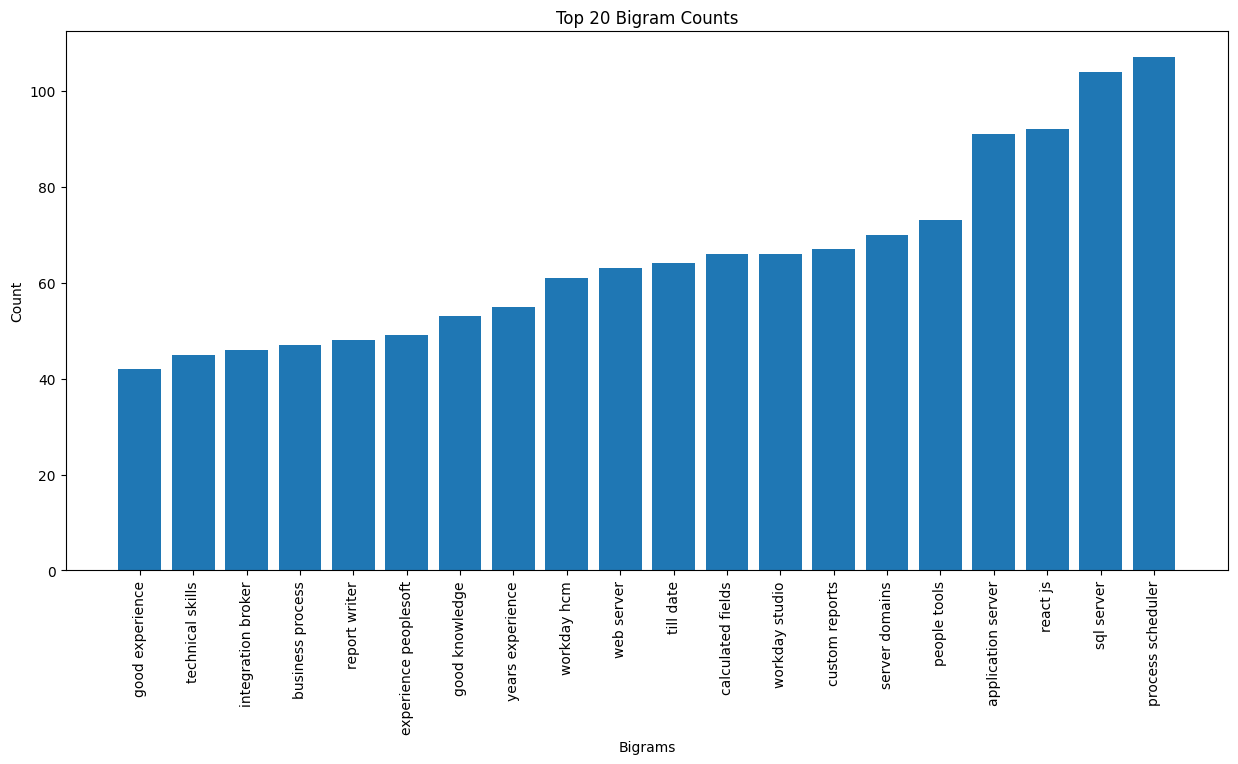

In [81]:
#Create a bar chart of the top 20 bigram counts 
plt.figure(figsize =(15, 7))
plt.bar(vocab[top_20_bigrams], counts.toarray()[0, top_20_bigrams])
plt.xticks(rotation =90)
plt.xlabel("Bigrams")
plt.ylabel("Count")
plt.title("Top 20 Bigram Counts")
plt.show()

###                                          OR

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = (vocab)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
X
print(vectorizer.get_feature_names_out())
print(X.toarray())


['000' '000webhostapp' '006' ... 'zp' 'ﬁnding' 'ﬁts']
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 1]]


### OR

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

# Combine all cleaned words into a single document string
doc = " ".join(words_without_punctuation)

# Create a CountVectorizer object for bigrams
vect = CountVectorizer(ngram_range=(2, 2))

# Fit the vectorizer to the document and transform into BoW vector
counts = vect.fit_transform([doc])

# Get the feature names (bigrams)
vocab = vect.get_feature_names_out()

# Convert BoW vector to a dictionary of bigram: count
bow_result = dict(zip(vocab, counts.toarray()[0]))

# Display the Bag of Words (bigram counts)
print(bow_result)

{'000 units': 1, '000 vehicles': 1, '000webhostapp com': 1, '006 fscm': 1, '01 1996': 1, '01 2019': 1, '016 strong': 1, '017 fscm': 1, '02 1992': 1, '02 2019': 1, '03 2012': 1, '03 2014': 1, '03 2018': 1, '03 2019': 2, '03 2020': 1, '03 2021': 1, '03 zp': 1, '032 strong': 1, '04 11': 1, '04 1993': 1, '04 2019': 2, '04 2021': 3, '04 years': 1, '04th feb': 1, '04th jan': 1, '05 09': 1, '05 1987': 1, '05 2015': 1, '05 2018': 1, '05 2021': 1, '05 apr': 1, '05 performing': 1, '05th jan': 1, '06 1998': 1, '06 2019': 2, '06 55': 1, '06 project': 1, '06th march': 1, '07 2017': 2, '07 application': 1, '07 fscm': 1, '07 peopletools': 1, '07th jan': 1, '08 1994': 1, '08 2011': 1, '08 2012': 1, '08 2014': 1, '08 2018': 1, '08 2020': 1, '08 55': 1, '08 56': 1, '08 applied': 1, '08 education': 1, '08 months': 1, '08 school': 1, '09 1985': 1, '09 2015': 1, '09 2020': 1, '0production environment': 1, '10 10': 1, '10 11gr2': 1, '10 12': 1, '10 12c': 7, '10 13': 1, '10 4236': 1, '10 55': 1, '10 academic

In [86]:
from sklearn.preprocessing import LabelEncoder
LE =LabelEncoder()
df["jobrole_LE"]  =LE.fit_transform(df["jobrole"])

In [87]:
df.head()

file_name            jobrole  \
0      Peoplesoft Admin_AnubhavSingh.docx  Peoplesoft Resume   
1    Peoplesoft Admin_G Ananda Rayudu.doc  Peoplesoft Resume   
2         Peoplesoft Admin_Gangareddy.doc  Peoplesoft Resume   
3            Peoplesoft Admin_Murali.docx  Peoplesoft Resume   
4  Peoplesoft Admin_Priyanka Ramadoss.doc  Peoplesoft Resume   

                                             content  word_count  jobrole_LE  
0  Anubhav Kumar Singh\t\t\n\n  To work in a glob...         934           0  
1  Profile Summary:\t\t\t\t\t\t\t\t\t\t\r7+ years...         987           0  
2  PeopleSoft Database Administrator\r           ...         786           0  
3  Murali\n\nExperience Summary \n\nI have 6 year...         528           0  
4  Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...         682           0

In [88]:
Y =df["jobrole_LE"]

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)  # Use top 5000 words
X = tfidf.fit_transform(df['content'])
X

<78x4669 sparse matrix of type '<class 'numpy.float64'>'
	with 22156 stored elements in Compressed Sparse Row format>

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size =0.2)   #(random_state =100)

In [91]:
print(df.shape)

(78, 5)


In [92]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(62, 4669)
(62,)
(16, 4669)
(16,)


### 1.Model Fitting Multinomial Naive Bayes 

In [94]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np

model = MultinomialNB()
model.fit(X_train, Y_train)

MultinomialNB()

In [95]:
y_pred_train =model.predict(X_train)
y_pred_test  =model.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
training_accuracy  =accuracy_score(Y_train, y_pred_train)
test_accuracy      =accuracy_score(Y_test, y_pred_test)
precision_training_score  =precision_score(Y_train, y_pred_train, average='weighted')
precision_test_score      =precision_score(Y_test, y_pred_test, average='weighted')
recall_training_score  =recall_score(Y_train, y_pred_train,average='weighted')
recall_test_score      =recall_score(Y_test, y_pred_test, average='weighted')
f1_training_score  =f1_score(Y_train, y_pred_train,average='weighted')
f1_test_score      =f1_score(Y_test, y_pred_test, average='weighted')

print("training accuracy score:", np.round(training_accuracy))
print("test accuracy score:", np.round(test_accuracy))
print("=========================================================")
print("Precision Training Score:", np.round(precision_training_score))
print("Precision Test Score:", np.round(precision_test_score))
print("==========================================================")
print("Recall Training Score:", np.round(recall_training_score))
print("Recall Test Score:", np.round(recall_test_score))
print("===========================================================")
print("F1 Training Score:", np.round(f1_training_score))
print("F1 Test Score:", np.round(f1_test_score))

training accuracy score: 1.0
test accuracy score: 1.0
Precision Training Score: 1.0
Precision Test Score: 1.0
Recall Training Score: 1.0
Recall Test Score: 1.0
F1 Training Score: 1.0
F1 Test Score: 1.0


### Training Accuracy Only

Accuracy: 0.9838709677419355
Precision: 0.9848197343453511
Recall: 0.9838709677419355
F1 Score: 0.9836908988012554

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        19
           2       1.00      0.90      0.95        10
           3       0.94      1.00      0.97        16

    accuracy                           0.98        62
   macro avg       0.99      0.97      0.98        62
weighted avg       0.98      0.98      0.98        62



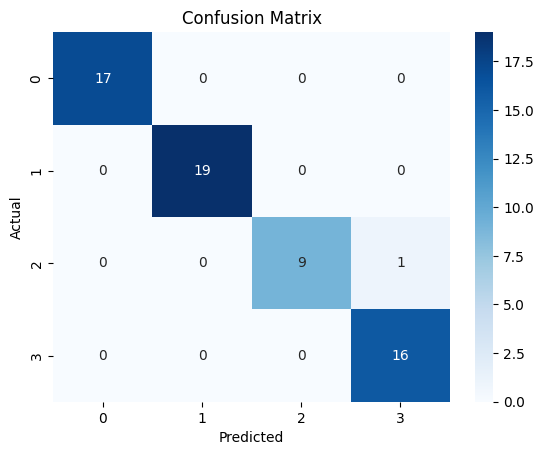

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Basic scores
print("Accuracy:", accuracy_score(Y_train, y_pred_train))
print("Precision:", precision_score(Y_train, y_pred_train, average='weighted'))
print("Recall:", recall_score(Y_train, y_pred_train, average='weighted'))
print("F1 Score:", f1_score(Y_train, y_pred_train, average='weighted'))


# Full report
print("\nClassification Report:")
print(classification_report(Y_train, y_pred_train))

# Confusion matrix
cm = confusion_matrix(Y_train, y_pred_train)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Testing Accuracy 

Accuracy: 0.8125
Precision: 0.875
Recall: 0.8125
F1 Score: 0.7753472222222222

Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.80      1.00      0.89         4
           2       1.00      0.25      0.40         4
           3       1.00      1.00      1.00         5

    accuracy                           0.81        16
   macro avg       0.85      0.81      0.76        16
weighted avg       0.88      0.81      0.78        16



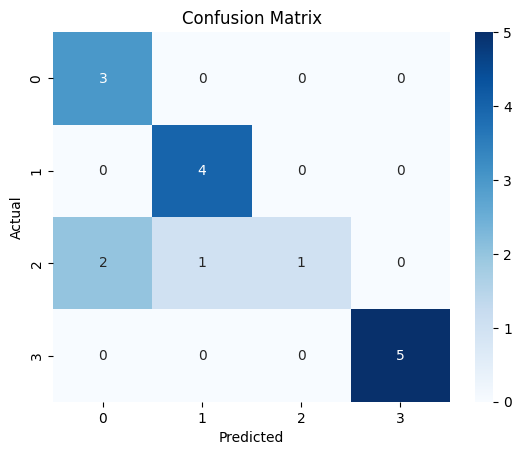

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Basic scores
print("Accuracy:", accuracy_score(Y_test, y_pred_test))
print("Precision:", precision_score(Y_test, y_pred_test, average='weighted'))
print("Recall:", recall_score(Y_test, y_pred_test, average='weighted'))
print("F1 Score:", f1_score(Y_test, y_pred_test, average='weighted'))

# Full report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_test))

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Cross Validation 

In [102]:
training_accuracy =[]
test_accuracy     =[]

for i in range(1, 101):
    X_train,X_test,Y_train,Y_test =train_test_split(X,Y, test_size =0.2, random_state =100, stratify =Y)
    model.fit(X_train, Y_train)
    y_pred_train  =model.predict(X_train)
    y_pred_test   =model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train, y_pred_train))
    test_accuracy.append(accuracy_score(Y_test, y_pred_test))
   
print("Cross validation: MultinomialNB Training accuracy scoe:", np.round(np.mean(training_accuracy), 2))
print("Cross validation: MultinomialNB Test accuracy score:",    np.round(np.mean(test_accuracy), 2))


Cross validation: MultinomialNB Training accuracy scoe: 0.98
Cross validation: MultinomialNB Test accuracy score: 0.94


### 2.Model fitting LogisticRegression

In [104]:
Y1 =df["jobrole_LE"]

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=50000)  # Use top 5000 words
X1 = tfidf.fit_transform(df['content'])


In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X1, Y1, test_size =0.2, random_state =42)

In [107]:
# Model fitting
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train) # fit with only traiing samples

LogisticRegression()

In [108]:
y_pred_train1 =model.predict(X_train)
y_pred_test1  =model.predict(X_test)

### Training Accuracy

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        17

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



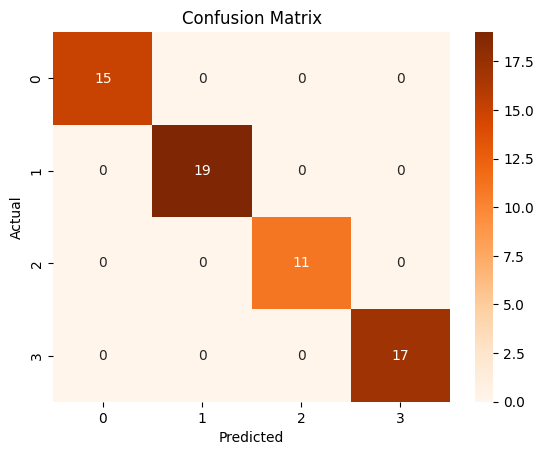

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Basic scores
print("Accuracy:", accuracy_score(Y_train, y_pred_train1))
print("Precision:", precision_score(Y_train, y_pred_train1, average='weighted'))
print("Recall:", recall_score(Y_train, y_pred_train1, average='weighted'))
print("F1 Score:", f1_score(Y_train, y_pred_train1, average='weighted'))


# Full report
print("\nClassification Report:")
print(classification_report(Y_train, y_pred_train1))

# Confusion matrix
cm = confusion_matrix(Y_train, y_pred_train1)
sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Test Accuracy

Accuracy: 0.9375
Precision: 0.95
Recall: 0.9375
F1 Score: 0.9375

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.95      0.95      0.94        16
weighted avg       0.95      0.94      0.94        16



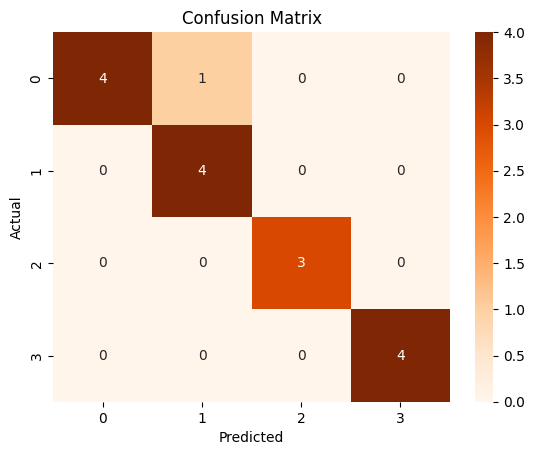

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Basic scores
print("Accuracy:", accuracy_score(Y_test, y_pred_test1))
print("Precision:", precision_score(Y_test, y_pred_test1, average='weighted'))
print("Recall:", recall_score(Y_test, y_pred_test1, average='weighted'))
print("F1 Score:", f1_score(Y_test, y_pred_test1, average='weighted'))

# Full report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_test1))

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred_test1)
sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Cross Validation
#### 1.Shulfie Split

In [114]:
training_accuracy =[]
test_accuracy     =[]

for i in range(1, 101):
    X_train,X_test,Y_train,Y_test =train_test_split(X1,Y1, test_size =0.2, random_state =100, stratify =Y)
    model.fit(X_train, Y_train)
    y_pred_train1  =model.predict(X_train)
    y_pred_test1   =model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train, y_pred_train1))
    test_accuracy.append(accuracy_score(Y_test, y_pred_test1))
    
print("Cross validation: LogisticRegression Training accuracy scoe:", np.round(np.mean(training_accuracy), 2))
print("Cross validation: LogisticRegression Test accuracy score:",    np.round(np.mean(test_accuracy), 2))

Cross validation: LogisticRegression Training accuracy scoe: 1.0
Cross validation: LogisticRegression Test accuracy score: 0.94


#### 2.BaggingClassifier

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

#Bagging Classifier with Logistic Regression 
bagging_model =BaggingClassifier(estimator =LogisticRegression(max_iter =1000),
                                 n_estimators =100, random_state =42)
bagging_model.fit(X_train, Y_train)


BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=100,
                  random_state=42)

In [117]:
y_pred_train_bagging =bagging_model.predict(X_train)
y_pred_test_bagging  =bagging_model.predict(X_test)

training_accuracy_bagging =accuracy_score(Y_train, y_pred_train_bagging)
test_accuracy_bagging     =accuracy_score(Y_test, y_pred_test_bagging)

print("Bagging - Training Accuracy:", training_accuracy_bagging)
print("Bagging - Test Accuracy:", test_accuracy_bagging)

Bagging - Training Accuracy: 1.0
Bagging - Test Accuracy: 0.9375


### 3.Model Fitting SVM

In [119]:
Y2 =df["jobrole_LE"]

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)  # Use top 5000 words
X2 = tfidf.fit_transform(df['content'])


In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X2, Y2, test_size =0.2, random_state =42)

In [122]:
from sklearn.svm import SVC
model =SVC(kernel ='linear')
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [123]:
y_pred_train2 =model.predict(X_train)
y_pred_test2  =model.predict(X_test)

### Training Accuracy

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        17

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



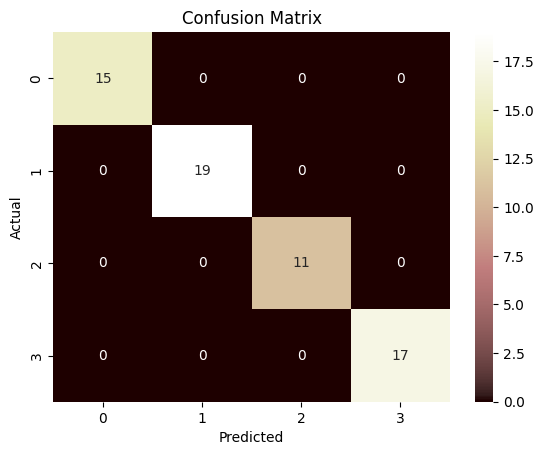

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Basic scores
print("Accuracy:", accuracy_score(Y_train, y_pred_train2))
print("Precision:", precision_score(Y_train, y_pred_train2, average='weighted'))
print("Recall:", recall_score(Y_train, y_pred_train2, average='weighted'))
print("F1 Score:", f1_score(Y_train, y_pred_train2, average='weighted'))


# Full report
print("\nClassification Report:")
print(classification_report(Y_train, y_pred_train2))

# Confusion matrix
cm = confusion_matrix(Y_train, y_pred_train2)
sns.heatmap(cm, annot=True, fmt='d', cmap='pink')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Test Accuracy

Accuracy: 0.9375
Precision: 0.95
Recall: 0.9375
F1 Score: 0.9375

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.95      0.95      0.94        16
weighted avg       0.95      0.94      0.94        16



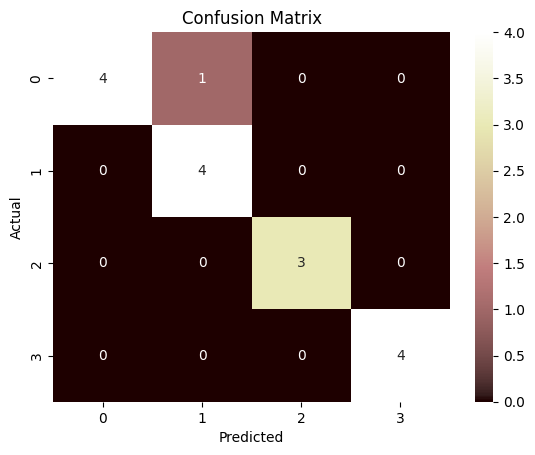

In [127]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Basic scores
print("Accuracy:", accuracy_score(Y_test, y_pred_test2))
print("Precision:", precision_score(Y_test, y_pred_test2, average='weighted'))
print("Recall:", recall_score(Y_test, y_pred_test2, average='weighted'))
print("F1 Score:", f1_score(Y_test, y_pred_test2, average='weighted'))

# Full report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_test2))

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred_test2)
sns.heatmap(cm, annot=True, fmt='d', cmap='pink')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Cross Validation

In [129]:
training_accuracy =[]
test_accuracy     =[]

for i in range(1, 101):
    X_train,X_test,Y_train,Y_test =train_test_split(X2,Y2, test_size =0.2, random_state =100, stratify =Y)
    model.fit(X_train, Y_train)
    y_pred_train2  =model.predict(X_train)
    y_pred_test2   =model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train, y_pred_train2))
    test_accuracy.append(accuracy_score(Y_test, y_pred_test2))
   
print("Cross validation: SVM Training accuracy scoe:", np.round(np.mean(training_accuracy), 2))
print("Cross validation: SVM Test accuracy score:",    np.round(np.mean(test_accuracy), 2))

Cross validation: SVM Training accuracy scoe: 1.0
Cross validation: SVM Test accuracy score: 0.94


### 4.Model Fitting DecisionTreeClassifier

In [131]:
Y3 =df["jobrole_LE"]
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=50000)  # Use top 5000 words
X3 = tfidf.fit_transform(df['content'])

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X3, Y3, test_size =0.2, random_state =42)

from sklearn.tree import DecisionTreeClassifier
model =DecisionTreeClassifier()
model.fit(X_train, Y_train)



DecisionTreeClassifier()

In [132]:
y_pred_train3 =model.predict(X_train)
y_pred_test3  =model.predict(X_test)

### Training Accuracy

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        17

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



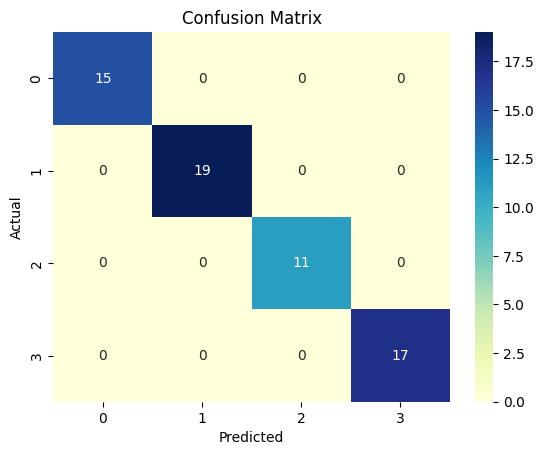

In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Basic scores
print("Accuracy:", accuracy_score(Y_train, y_pred_train3))
print("Precision:", precision_score(Y_train, y_pred_train3, average='weighted'))
print("Recall:", recall_score(Y_train, y_pred_train3, average='weighted'))
print("F1 Score:", f1_score(Y_train, y_pred_train3, average='weighted'))


# Full report
print("\nClassification Report:")
print(classification_report(Y_train, y_pred_train3))

# Confusion matrix
cm = confusion_matrix(Y_train, y_pred_train3)
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Test Accuracy

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



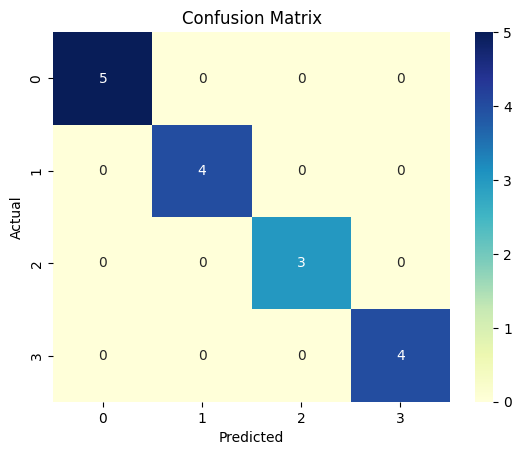

In [136]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Basic scores
print("Accuracy:", accuracy_score(Y_test, y_pred_test3))
print("Precision:", precision_score(Y_test, y_pred_test3, average='weighted'))
print("Recall:", recall_score(Y_test, y_pred_test3, average='weighted'))
print("F1 Score:", f1_score(Y_test, y_pred_test3, average='weighted'))

# Full report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_test3))

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred_test3)
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Cross Validation

In [138]:
training_accuracy =[]
test_accuracy     =[]

for i in range(1, 101):
    X_train,X_test,Y_train,Y_test =train_test_split(X3,Y3, test_size =0.2, random_state =100, stratify =Y)
    model =DecisionTreeClassifier(criterion ='gini')
    model.fit(X_train, Y_train)
    y_pred_train3  =model.predict(X_train)
    y_pred_test3   =model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train, y_pred_train3))
    test_accuracy.append(accuracy_score(Y_test, y_pred_test3))
   
print("Cross validation: DecisionTreeClassifier Training accuracy scoe:", np.round(np.mean(training_accuracy), 2))
print("Cross validation: DecisionTreeClassifier Test accuracy score:",    np.round(np.mean(test_accuracy), 2))

Cross validation: DecisionTreeClassifier Training accuracy scoe: 1.0
Cross validation: DecisionTreeClassifier Test accuracy score: 0.96


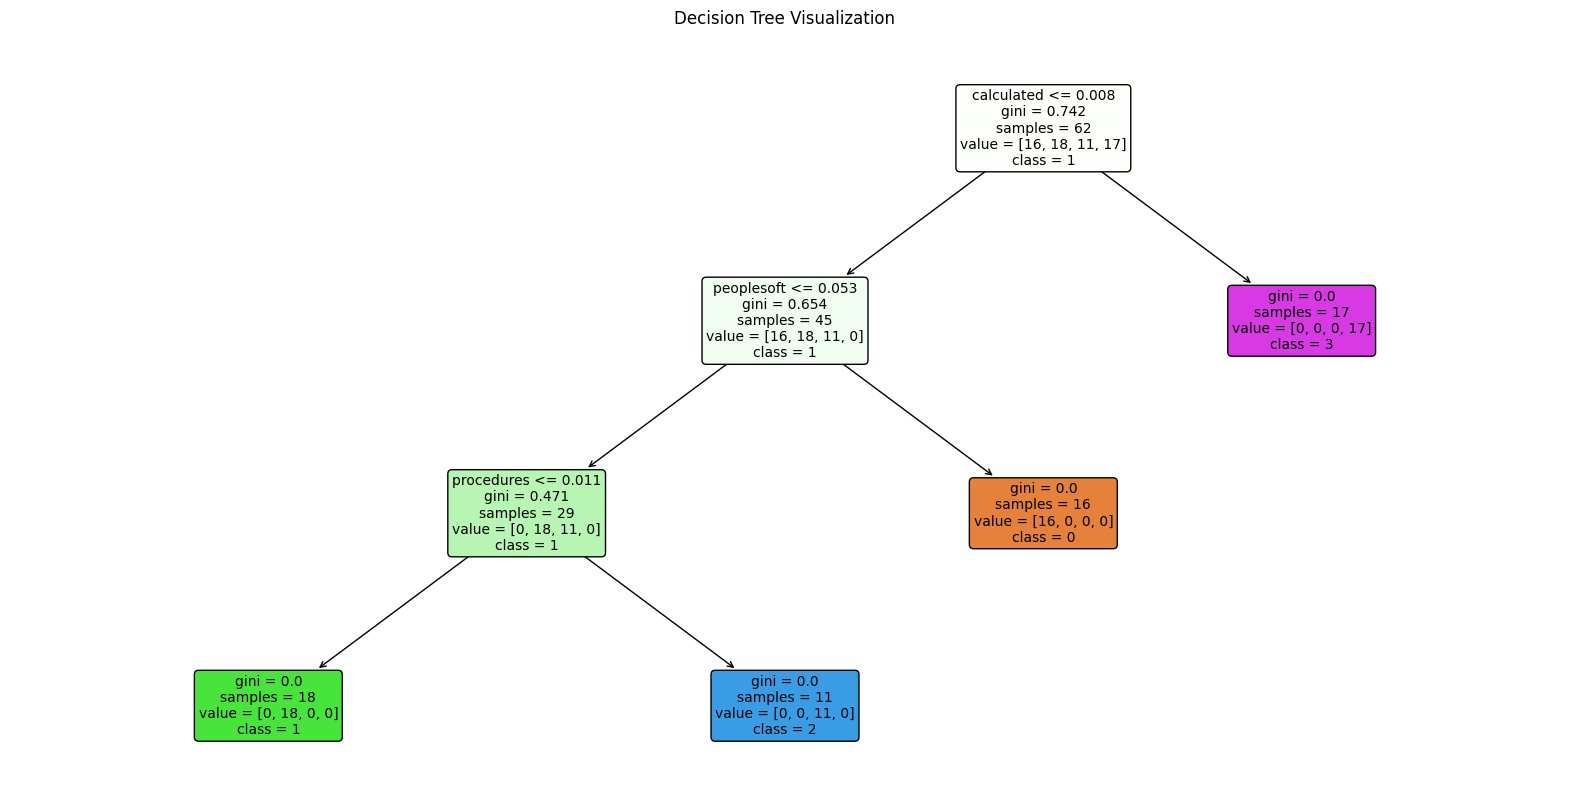

In [139]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Step 1: Get correct feature names from TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

# Step 2: Get correct class names from the trained model
class_names = [str(cls) for cls in model.classes_]

# Step 3: Plot the tree (you can limit the depth for clarity)
plt.figure(figsize=(20, 10))
plot_tree(model,
          filled=True,
          feature_names=feature_names,
          class_names=class_names,
          max_depth=16,  # Set to a small number for visualization; increase if needed
          fontsize=10,
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


### OR

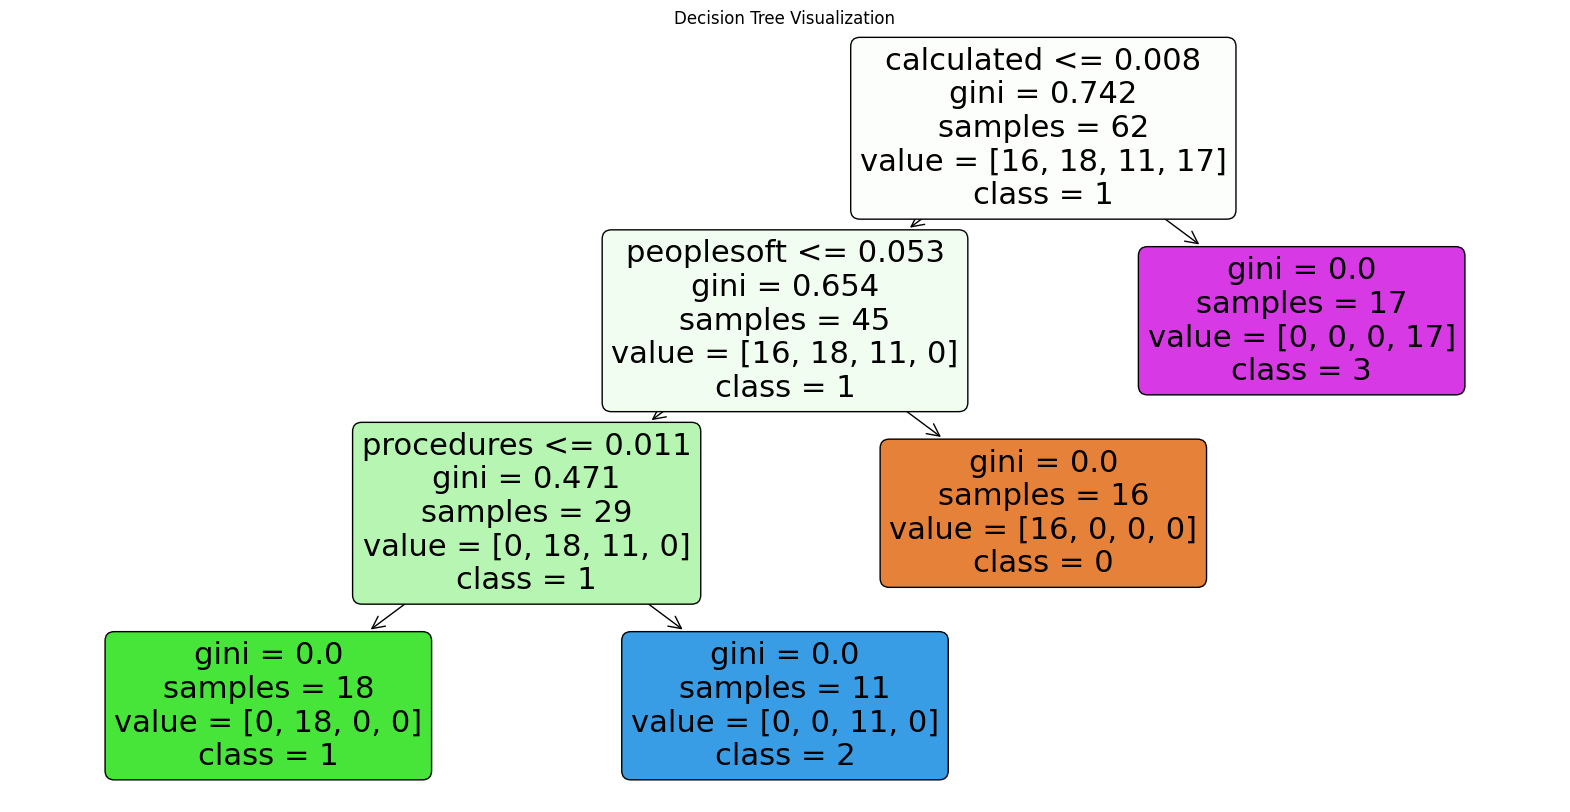

In [141]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model,
          filled=True,
          feature_names=tfidf.get_feature_names_out(),  
          class_names=[str(cls) for cls in model.classes_],  
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [142]:
from sklearn.ensemble import BaggingClassifier

# Bagging Classifier
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='gini'),
                                  n_estimators=100, random_state=42,
                                  max_samples=0.6,max_features=0.7)
bagging_model.fit(X_train, Y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.7,
                  max_samples=0.6, n_estimators=100, random_state=42)

In [143]:
y_pred_train_bagging = bagging_model.predict(X_train)
y_pred_test_bagging = bagging_model.predict(X_test)

training_accuracy_bagging = accuracy_score(Y_train, y_pred_train_bagging)
test_accuracy_bagging = accuracy_score(Y_test, y_pred_test_bagging)

print("Bagging - Training Accuracy:", training_accuracy_bagging)
print("Bagging - Test Accuracy:", test_accuracy_bagging)

Bagging - Training Accuracy: 1.0
Bagging - Test Accuracy: 1.0


### 5.Model Fitting KNeighborsClassifier

In [145]:
Y4 =df["jobrole_LE"]
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=50000)  # Use top 5000 words
X4 = tfidf.fit_transform(df['content'])

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X4, Y4, test_size =0.2, random_state =42)

# Model fitting
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train,Y_train) # fit with only traiing samples

KNeighborsClassifier()

In [146]:
y_pred_train4 =model.predict(X_train)
y_pred_test4  =model.predict(X_test)

### Training Accuracy

Accuracy: 0.9838709677419355
Precision: 0.9852150537634408
Recall: 0.9838709677419355
F1 Score: 0.984003638982601

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.95      0.97        19
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        17

    accuracy                           0.98        62
   macro avg       0.98      0.99      0.98        62
weighted avg       0.99      0.98      0.98        62



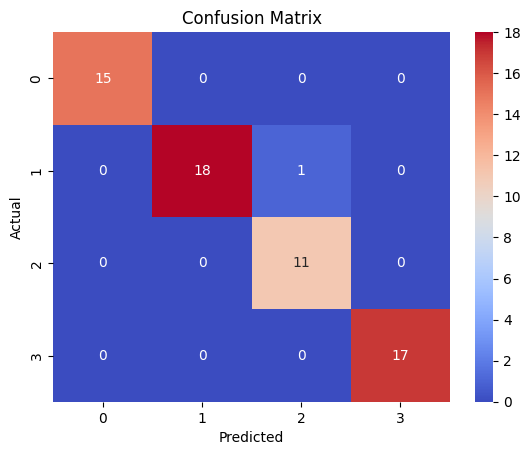

In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Basic scores
print("Accuracy:", accuracy_score(Y_train, y_pred_train4))
print("Precision:", precision_score(Y_train, y_pred_train4, average='weighted'))
print("Recall:", recall_score(Y_train, y_pred_train4, average='weighted'))
print("F1 Score:", f1_score(Y_train, y_pred_train4, average='weighted'))


# Full report
print("\nClassification Report:")
print(classification_report(Y_train, y_pred_train4))

# Confusion matrix
cm = confusion_matrix(Y_train, y_pred_train4)
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Test Accuracy

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



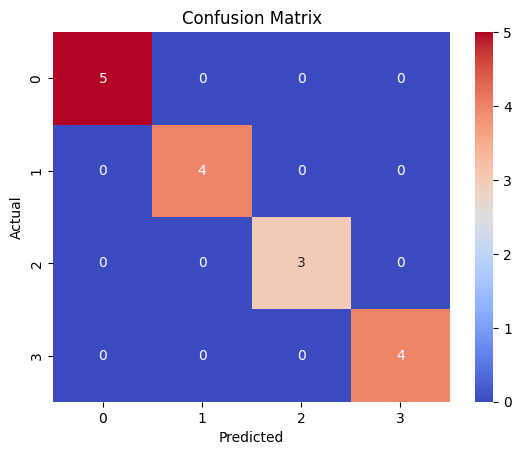

In [150]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Basic scores
print("Accuracy:", accuracy_score(Y_test, y_pred_test4))
print("Precision:", precision_score(Y_test, y_pred_test4, average='weighted'))
print("Recall:", recall_score(Y_test, y_pred_test4, average='weighted'))
print("F1 Score:", f1_score(Y_test, y_pred_test4, average='weighted'))

# Full report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_test4))

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred_test4)
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Cross Validation

In [152]:
training_accuracy =[]
test_accuracy     =[]

for i in range(1, 101):
    X_train,X_test,Y_train,Y_test =train_test_split(X4,Y4, test_size =0.2, random_state =100, stratify =Y)
    model =KNeighborsClassifier(n_neighbors =5)
    model.fit(X_train, Y_train)
    y_pred_train4  =model.predict(X_train)
    y_pred_test4   =model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train, y_pred_train4))
    test_accuracy.append(accuracy_score(Y_test, y_pred_test4))
    
print("Cross validation: KNeighborsClassifier Training accuracy scoe:", np.round(np.mean(training_accuracy), 2))
print("Cross validation: KNeighborsClassifier Test accuracy score:",    np.round(np.mean(test_accuracy), 2))

Cross validation: KNeighborsClassifier Training accuracy scoe: 0.98
Cross validation: KNeighborsClassifier Test accuracy score: 1.0


### 6.Model Fitting RandomForestClassifier

In [154]:
Y5 =df["jobrole_LE"]
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=50000)  # Use top 5000 words
X5 = tfidf.fit_transform(df['content'])

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X5, Y5, test_size =0.2, random_state =42)

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,
                                  max_samples=0.6, max_features=0.7,max_depth=10)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, max_features=0.7, max_samples=0.6,
                       random_state=42)

In [155]:
y_pred_train5 =model.predict(X_train)
y_pred_test5  =model.predict(X_test)

### Training Accuracy

Accuracy: 0.9838709677419355
Precision: 0.9852150537634408
Recall: 0.9838709677419355
F1 Score: 0.984003638982601

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.95      0.97        19
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        17

    accuracy                           0.98        62
   macro avg       0.98      0.99      0.98        62
weighted avg       0.99      0.98      0.98        62



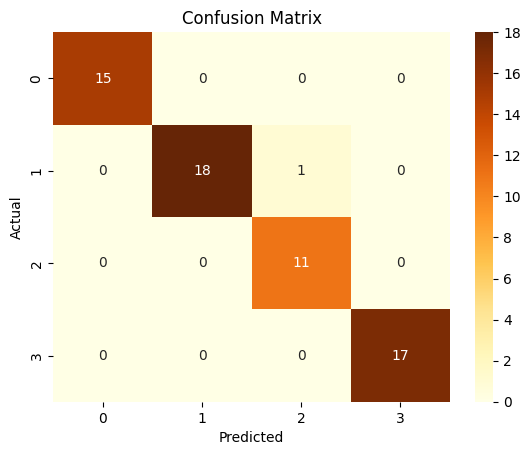

In [157]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Basic scores
print("Accuracy:", accuracy_score(Y_train, y_pred_train5))
print("Precision:", precision_score(Y_train, y_pred_train5, average='weighted'))
print("Recall:", recall_score(Y_train, y_pred_train5, average='weighted'))
print("F1 Score:", f1_score(Y_train, y_pred_train5, average='weighted'))


# Full report
print("\nClassification Report:")
print(classification_report(Y_train, y_pred_train5))

# Confusion matrix
cm = confusion_matrix(Y_train, y_pred_train5)
sns.heatmap(cm, annot=True, fmt='d', cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Test Accuracy

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



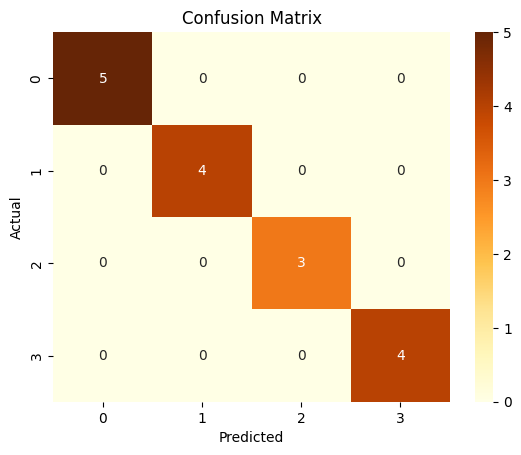

In [159]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Basic scores
print("Accuracy:", accuracy_score(Y_test, y_pred_test5))
print("Precision:", precision_score(Y_test, y_pred_test5, average='weighted'))
print("Recall:", recall_score(Y_test, y_pred_test5, average='weighted'))
print("F1 Score:", f1_score(Y_test, y_pred_test5, average='weighted'))

# Full report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_test5))

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred_test5)
sns.heatmap(cm, annot=True, fmt='d', cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Cross Validation

In [161]:
training_accuracy =[]
test_accuracy     =[]

for i in range(1, 101):
    X_train,X_test,Y_train,Y_test =train_test_split(X5,Y5, test_size =0.2, random_state =100, stratify =Y)
    model.fit(X_train, Y_train)
    y_pred_train5  =model.predict(X_train)
    y_pred_test5   =model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train, y_pred_train5))
    test_accuracy.append(accuracy_score(Y_test, y_pred_test5))
    
print("Cross validation: RandomForestClassifier Training accuracy scoe:", np.round(np.mean(training_accuracy), 2))
print("Cross validation: RandomForestClassifier Test accuracy score:",    np.round(np.mean(test_accuracy), 2))

Cross validation: RandomForestClassifier Training accuracy scoe: 0.98
Cross validation: RandomForestClassifier Test accuracy score: 1.0


In [162]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier 
rf_model =RandomForestClassifier(n_estimators =100, random_state =42,
                                max_samples =0.6)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(max_samples=0.6, random_state=42)

In [163]:
y_pred_train_rf  =rf_model.predict(X_train)
y_pred_test_rf   =rf_model.predict(X_test)

training_accuracy_rf =accuracy_score(Y_train, y_pred_train_rf)
test_accuracy_rf     =accuracy_score(Y_test, y_pred_test_rf)

print("Random Forest - Training Accuracy:", training_accuracy_rf)
print("Random Forest - Test accuracy:", test_accuracy_rf)

Random Forest - Training Accuracy: 1.0
Random Forest - Test accuracy: 0.875


### Model Deployment

In [165]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("your_dataframe.csv")

# Features & Labels
X_raw = df['content']
y_raw = df['jobrole']

# Encode job roles
le = LabelEncoder()
y = le.fit_transform(y_raw)

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(X_raw).toarray()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model =SVC(kernel ='linear')
model.fit(X_train, y_train)

# Save model and encoders
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(le, open('label_encoder.pkl', 'wb'))

print("✅ Model & transformers saved!")

✅ Model & transformers saved!


In [166]:
import streamlit as st
import pickle
import PyPDF2
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
